### 矩阵定义
$$
X=\left[
 \begin{matrix}
   x_{1} & x_{2} & x_{3} \\
  \end{matrix} 
\right], 
W=\left[
 \begin{matrix}
   w_{11} & w_{12} \\
   w_{21} & w_{22} \\
   w_{31} & w_{32} \\
  \end{matrix} 
\right], 
B=\left[
 \begin{matrix}
   b_{1} & b_{2} \\
  \end{matrix} 
\right], 
Y=\left[
 \begin{matrix}
   y_{1} & y_{2} \\
  \end{matrix} 
\right],
Z=\left[
 \begin{matrix}
   z_{1} & z_{2} \\
  \end{matrix} 
\right]
$$

### 前向传播

$$
  y_{1} = x_{1}*w_{11} + x_{2}*w_{21} + x_{3}*w_{31} + b_{1}
$$

$$
  y_{2} = x_{1}*w_{12} + x_{2}*w_{22} + x_{3}*w_{32} + b_{2}
$$

$$
  z_{1} = sigmoid(y_{1})
$$

$$
  z_{2} = sigmoid(y_{2})
$$

$$ 
Y = X*W + B =\left[
 \begin{matrix}
   x_{1} & x_{2} & x_{3} \\
  \end{matrix} 
\right]*
\left[
 \begin{matrix}
   w_{11} & w_{12}  \\
   w_{21} & w_{22}  \\
   w_{31} & w_{32}  \\
  \end{matrix} 
\right]+
\left[
 \begin{matrix}
   b_{1} & b_{2} \\
  \end{matrix} 
\right]
=
\left[
 \begin{matrix}
   y_{1} & y_{2} \\
  \end{matrix} 
\right]
$$

$$
Z = sigmoid(Y)
$$

$$
  如果Z不是输出层，那么Z是下一层的输入(X) ，而且如果Z是输出层，一般不激活(直接输出Y)，或者理解为(Z=Y)
$$

$$
  用一个损失函数评价和标准值的距离，我们希望距离越小越好
$$

$$
   损失函数 (MSE)\ \ \  loss = \sum_{i=1}^{n} \frac{ ( out_{i} - label_{i} )^ {2}}{2}
$$

可以理解为下面这个向量求和

$$
\left[
 \begin{matrix}
   loss_{1} & loss_{2} & \ ... \  & loss_{n}\\
  \end{matrix} 
\right]
=\left[
 \begin{matrix}
   out_{1} - label_{1} & out_{2} - label_{2} & \ ... \  & out_{n} - label_{n}\\
  \end{matrix} 
\right]
$$

### 反向传播思路


$$
目标求解每一层的 \frac {\partial loss}{\partial w} 和 \frac {\partial loss}{\partial b}
$$

$$
迭代\ \ w - lr *\frac {\partial loss}{\partial w}\ \ \ 和 \ \ \ b - lr * \frac {\partial loss}{\partial b}
$$

$$
达到减少loss的效果
$$



$$
    \frac {\partial loss}{\partial w_{ij}}= \frac {\partial loss}{\partial z_{j}} * \frac {\partial z_{j}}{\partial y_{j}} * \frac {\partial y_{j}}{\partial w_{ij}}   
$$

$$  \frac {\partial loss}{\partial b_{j}}=\frac {\partial loss}{\partial z_{j}} * \frac {\partial z_{j}}{\partial y_{j}} * \frac {\partial y_{j}}{\partial b_{j}}
$$

$$   \frac {\partial loss}{\partial z^{-1}_{j}} = \frac {\partial loss}{\partial z_{j}} * \frac {\partial z_{j}}{\partial y_{j}} * \frac {\partial y_{j}}{\partial z^{-1}_{j}}
$$

$$
    z^{-1}_{j} 代表前一层的输出，即为这一层输入 x_{j}，然后继续可以对前一层的误差进行求w，b，和前前一层的误差
$$
$$
    不激活时,可以看做 z = y \ \ 那么 \frac {\partial z_{j}}{\partial y_{j}} = 1
$$

### 反向传播中的标量形式
$$
    我们回顾一下， loss =  \sum_{i=1}^{n} \frac{ ( out_{i} - label_{i} )^ {2}}{2} = \sum_{i=1}^{n} \frac{ ( z_{i} - label_{i} )^ {2}}{2}
$$

$$
    \frac {\partial loss} {\partial z_{j}} = \ z_{j} - label_{j} \
$$

$$
    不激活的情况下 \frac {\partial z_{j}}{\partial y_{j}} = 1
$$

$$
    用sigmoid激活的情况下\frac {\partial z_{j}}{\partial y_{j}} = (\  1 - sigmoid(y_{j}) \ ) * sigmoid(\ y_{j}\ )
$$

$$
    这里说明一下 函数 \ f(x) = sigmoid(x) \ 的导数为 \ \frac{\partial f(x)}{\partial x} = sigmoid(x) * ( 1 - sigmoid(x))
$$

$$
    这样(以sigmoid激活为例子) \frac {\partial loss}{\partial z_{j}} * \frac {\partial z_{j}}{\partial y_{j}} = (\ z_{j} - label_{j} \ ) * sigmoid(z_{j}) * ( 1 - sigmoid(z_{j}))
$$


#### weight 和 bias 标量形式推导
$$若计算\ \frac {\partial loss}{\partial w_{ij}}= \frac {\partial loss}{\partial z_{j}} * \frac {\partial z_{j}}{\partial y_{j}} * \frac {\partial y_{j}}{\partial w_{ij}} ,只需求\frac {\partial y_{j}}{\partial w_{ij}}   $$

$$ 若计算 \frac {\partial loss}{\partial b_{j}}=\frac {\partial loss}{\partial z_{j}} * \frac {\partial z_{j}}{\partial y_{j}} * \frac {\partial y_{j}}{\partial b_{j}} ,只需求\frac {\partial y_{j}}{\partial b_{j}}
$$
以上面为例

$$ y_{1} = x_{1}*w_{11} + x_{2}*w_{21} + x_{3}*w_{31} + b_{1}
$$

得到一般的算式

$$ y_{j} = x_{1}*w_{1j} + x_{2}*w_{2j}\ +\ ...\ +\ x_{i}*w_{ij}\ +\ ...\ +\ x_{n}*w_{nj} + b_{j}
$$

我们可以一并得到

$$
    \frac {\partial y_{j}}{\partial w_{ij}} = x_{i}
$$

$$
    \frac {\partial y_{j}}{\partial b_{j}} = 1
$$
所以得出
$$
\frac {\partial loss}{\partial w_{ij}}= \frac {\partial loss}{\partial z_{j}} * \frac {\partial z_{j}}{\partial y_{j}} * \frac {\partial y_{j}}{\partial w_{ij}} = (\ z_{j} - label_{j} \ ) * sigmoid(z_{j}) * ( 1 - sigmoid(z_{j})) * x_{i}\ \ \ \ [1]
$$

$$
\frac {\partial loss}{\partial b_{j}}= \frac {\partial loss}{\partial z_{j}} * \frac {\partial z_{j}}{\partial y_{j}} * \frac {\partial y_{j}}{\partial b_{j}} = (\ z_{j} - label_{j} \ ) * sigmoid(z_{j}) * ( 1 - sigmoid(z_{j})) * 1 \ \ \ \ \ [2]
$$




#### 前一层误差推导

$$
这里推导 \frac{\partial loss}{\partial z^{-1}_{j} } = \frac{\partial loss}{\partial x_{j}} 其中前一层的输出就是这一层的输入
$$

$$
loss = \sum_{i=1}^{n} \frac{ ( out_{i} - label_{i} )^ {2}}{2} = \sum_{i=1}^{n} \frac{ ( z_{i} - label_{i} )^ {2}}{2} 
$$

从刚才的正项传播:
$$
  y_{1} = x_{1}*w_{11} + x_{2}*w_{21} + x_{3}*w_{31} + b_{1}
$$

$$
  y_{2} = x_{1}*w_{12} + x_{2}*w_{22} + x_{3}*w_{32} + b_{2}
$$

$$
可以发现x_{i} 和 \ y_{j} ,\ j \in 1,\ 2,\ 3,\ ... \ ,n\ \ 有关, \ 就是和y中每一项有关
$$

$$
与上边weight 与bias不同,
weight 和 bias 仅与y中某一项有关 
$$

$$
y到z是单射函数,所以x_{i} 和 \ z_{j}\  ,j \in 1,\ 2,\ 3,\ ... \ ,n\ \ 有关,
$$

$$如果计算 \ \frac {\partial loss}{\partial z^{-1}_{j}}=\frac {\partial loss}{\partial z_{j}} * \frac {\partial z_{j}}{\partial y_{j}} * \frac {\partial y_{j}}{\partial z^{-1}_{j}} 则需要计算\ \frac {\partial y_{j}}{\partial z^{-1}_{j}}
$$
求和
$$
 注意，这里的 z^{-1}_{j} 就相当于这一层的 x_{j}
$$

所以得到

$$
\frac {\partial loss}{\partial z_{j}^{-1}}= \sum_{i=1}^{n} \frac {\partial loss}{\partial z_{i}} * \frac {\partial z_{i}}{\partial y_{i}} * \frac {\partial y_{i}}{\partial z_{j}^{-1}} = \sum_{i=1}^{n} \frac {\partial loss}{\partial z_{i}} * \frac {\partial z_{i}}{\partial y_{i}} * \frac {\partial y_{i}}{\partial x_{j}} 
$$

得到一般的算式
$$
 y_{i} = x_{1}*w_{1i} + x_{2}*w_{2i}\ +\ ...\ +\ x_{j}*w_{ji}\ +\ ...\ +\ x_{m}*w_{mi} + b_{i}
$$

$$
\frac {\partial y_{i}}{\partial z^{-1}_{j}} = w_{ji}
$$


$$
\frac {\partial loss}{\partial z_{j}^{-1}}= \sum_{i=1}^{n} \frac {\partial loss}{\partial z_{i}} * \frac {\partial z_{i}}{\partial y_{i}} * \frac {\partial y_{i}}{\partial z_{j}^{-1}} = \sum_{i=1}^{n} \frac {\partial loss}{\partial z_{i}} * \frac {\partial z_{i}}{\partial y_{i}} * \frac {\partial y_{i}}{\partial x_{j}} = \sum_{i=1}^{n} (\ z_{i} - label_{i} \ ) * sigmoid(z_{i}) * ( 1 - sigmoid(z_{i})) * w_{ji}\ \ \ \ [3]
$$

### 矩阵形式的梯度
我们转换为矩阵形式，我们一开始定义的矩阵如下:
$$
X=\left[
 \begin{matrix}
   x_{1} & x_{2} & x_{3} \\
  \end{matrix} 
\right], 
W=\left[
 \begin{matrix}
   w_{11} & w_{12} \\
   w_{21} & w_{22} \\
   w_{31} & w_{32} \\
  \end{matrix} 
\right], 
B=\left[
 \begin{matrix}
   b_{1} & b_{2} \\
  \end{matrix} 
\right], 
Y=\left[
 \begin{matrix}
   y_{1} & y_{2} \\
  \end{matrix} 
\right],
Z=\left[
 \begin{matrix}
   z_{1} & z_{2} \\
  \end{matrix} 
\right]
$$

$$Y\ =\ XW \ + B 
$$

$$
Z = sigmoid(Y)
$$

$$
\frac {\partial loss}{\partial Z} =\ Z - Label \ = 
\left[
 \begin{matrix}
   z_{1} - label_{1} & z_{2} - label_{2}\\
  \end{matrix} 
\right]
$$

$$
\frac {\partial z_{j}}{\partial y_{j}} = sigmoid(Y) * ( 1\ -\ sigmoid(Y)) \ \ \ \ * 为点乘(对应元素相乘)
$$

$$
\frac {\partial loss}{\partial W}=  X^{T}\ @\ \frac {\partial loss}{\partial Z} * \frac {\partial Z}{\partial Y} * \frac {\partial Y}{\partial W} = (\ Z - Label \ ) * sigmoid(Z) * ( 1 - sigmoid(Z)) \ \ \ \ [4]  \ \ \ \ @ \ 为矩阵乘法
$$

$$\frac {\partial loss}{\partial B}= \frac {\partial loss}{\partial Z} * \frac {\partial Z}{\partial Y} * \frac {\partial Y}{\partial B} = (\ Z - Label \ ) * sigmoid(Z) * ( 1 - sigmoid(Z)) \ \ \ \  [5]$$

$$
\frac {\partial loss}{\partial X}= \frac {\partial loss}{\partial Z} * \frac {\partial Z}{\partial Y} * \frac {\partial Y}{\partial B} = (\ Z - Label \ ) * sigmoid(Z) * ( 1 - sigmoid(Z)) \ @\ W^{T}  \ \ \ \  [6]
$$

### 推导 [4] 的细节
[4]式是由$\ [1]\ 式$得出

$$ 不妨设 A =\frac {\partial loss}{\partial Z} * \frac {\partial Z}{\partial Y}= (\ Z - Label \ ) * sigmoid(Z) * ( 1 - sigmoid(Z))$$
由[1]可以得出

$$
\left[
 \begin{matrix}
   \frac{\partial loss}{\partial w_{11}} & \frac{\partial loss}{\partial w_{12}}  & \ ... \  & \frac{\partial loss}{\partial w_{1n}}\\
   \frac{\partial loss}{\partial w_{21}} & \frac{\partial loss}{\partial w_{22}}  & \ ... \  & \frac{\partial loss} {\partial w_{2n}}\\
   ... \  & ... \   & \ ... \  & ...  \\
   \frac{\partial loss}{\partial w_{m1}} & \frac{\partial loss}{\partial w_{m2}}  & \ ... \  & \frac{\partial loss} {\partial w_{mn}}\\
  \end{matrix} 
\right]=
\left[
 \begin{matrix}
   x_{1}*a_{1} & x_{1}*a_{2}  & \ ... \  & x_{1}*a_{n}\\
   x_{2}*a_{1} & x_{2}*a_{2}  & \ ... \  & x_{2}*a_{n}\\
   ... \  & ... \   & \ ... \  & ...  \\
    x_{m}*a_{1} & x_{m}*a_{2}  & \ ... \  & x_{m}*a_{n}\\
  \end{matrix} 
\right]
=
\left[
 \begin{matrix}
   x_{1} \\
   x_{2} \\
   ... \\
    x_{m}\\
  \end{matrix} 
\right]
\left[
 \begin{matrix}
   a_{1} & a_{2}  & \ ... \  & a_{n}\\
  \end{matrix} 
\right]
$$


即为
$$
 \frac {\partial loss}{\partial W}= X^{t} @ A
$$
[4]公式成立

### 推导 [6] 的细节
[6]式是由  [3] 式 得出
$$ 不妨设 A =\frac {\partial loss}{\partial Z} * \frac {\partial Z}{\partial Y}= (\ Z - Label \ ) * sigmoid(Z) * ( 1 - sigmoid(Z))$$

$$
\left[
 \begin{matrix}
   \frac{\partial loss}{\partial x_{1}} & \frac{\partial loss}{\partial x_{2}}  & \ ... \  & \frac{\partial loss}{\partial x_{m}}\\
  \end{matrix} 
\right]=
\left[
 \begin{matrix}
   w_{11}*a_{1} + w_{12}*a_{2}  +  ... + x_{1n}*a_{n} & ... & w_{m1}*a_{1} + w_{m2}*a_{2}  +  ...   + w_{mn}*a_{n} \\
  \end{matrix} 
\right]
=
\left[
 \begin{matrix}
   a_{1} &
   a_{2}  &
   ...  &
    a_{n}\\
  \end{matrix} 
\right]
\left[
 \begin{matrix}
   w_{11} & w_{21}  & \ ... \  & w_{m1}\\
   w_{12} & w_{22}  & \ ... \  & w_{m2}\\
    ... &  ... &  ... & ... \\
   w_{1n} & w_{2n}  & \ ... \  & w_{mn}\\
  \end{matrix} 
\right]
$$

即为
$$
 \frac {\partial loss}{\partial X}= A\  @\ W^{T}
$$
[6]公式成立

### 代码实现

注意本代码反向传播中，提到的未激活的误差(error_next_layer_before_active)指A

$$
A =\frac {\partial loss}{\partial Z} * \frac {\partial Z}{\partial Y}
$$
### 核心函数如下




In [ ]:
def backward_layer(pre_layer_after_active,error_next_layer_before_active,weight,bias,batch,lr,debug=False):
    bias_gradient = np.sum(error_next_layer_before_active,axis=0)/batch
    error_pre_layer_before_active = error_next_layer_before_active @ weight.T
    weight_step = weight - weight_gradient * lr
    bias_step = bias - bias_gradient * lr
    return weight_step,bias_step,error_pre_layer_before_active

def get_before_active(forward_before_active,error_after):
    return sigmoid_grad(forward_before_active) * error_after

def backward_layer_and_get_before_active(forward_pre_layer_before_active,
                                         forward_pre_layer_after_active,
                                         backward_error_next_layer_before_active, weight, bias, batch, lr,debug=False):
    w,b,ep=backward_layer(forward_pre_layer_after_active, backward_error_next_layer_before_active, weight, bias, batch, lr,debug)
    return w,b,get_before_active(forward_pre_layer_before_active,ep)


# 完整代码

In [145]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x_):
    return 1 / (1 + np.exp(-x_))


def sigmoid_grad(x_):
    return (1.0 - sigmoid(x_)) * sigmoid(x_)
#pre_layer_after_active  前向传播激活后
#error_next_layer_before_active 反向传播激活前（已经进入过激活层了）
def backward_layer(pre_layer_after_active,error_next_layer_before_active,weight,bias,batch,lr,debug=False):
    if debug :
        print("pre_layer_after_active",pre_layer_after_active.shape)
        print("error_next_layer_before_active",error_next_layer_before_active.shape)
    weight_gradient = pre_layer_after_active.T @ error_next_layer_before_active
    bias_gradient = np.sum(error_next_layer_before_active,axis=0)/batch
    error_pre_layer_before_active = error_next_layer_before_active @ weight.T
    weight_step = weight - weight_gradient * lr
    bias_step = bias - bias_gradient * lr
    return weight_step,bias_step,error_pre_layer_before_active

def get_before_active(forward_before_active,error_after):
    return sigmoid_grad(forward_before_active) * error_after

def backward_layer_and_get_before_active(forward_pre_layer_before_active,
                                         forward_pre_layer_after_active,
                                         backward_error_next_layer_before_active, weight, bias, batch, lr,debug=False):
    w,b,ep=backward_layer(forward_pre_layer_after_active, backward_error_next_layer_before_active, weight, bias, batch, lr,debug)
    return w,b,get_before_active(forward_pre_layer_before_active,ep)

class BP:
    def __init__(self, input_size, hidden_size, output_size, hidden_cnt,batcH_size=100,learn_rate=0.02):
        self.in_layer = None
        self.hidden_layer_before_active = None
        self.hidden_layer = None
        self.out_layer = None
        self.batch_size = None
        self.hidden_cnt = hidden_cnt
        self.weight_in_hid = np.random.rand(input_size, hidden_size)
        self.bias_hid = np.random.rand(hidden_size)
        self.hidden_mid_before_active = []
        self.hidden_mid_after_active = []
        self.hidden_mid_weight = np.random.rand(hidden_cnt,hidden_size, hidden_size)
        self.hidden_mid_bias = np.random.rand(hidden_cnt,hidden_size)
        self.weight_hid_out = np.random.rand(hidden_size, output_size)
        self.bias_out = np.random.rand(output_size)
        self.learn_rate = learn_rate

    def forward(self, data):
        self.hidden_mid_before_active = []
        self.hidden_mid_after_active = []
        for i in range(self.hidden_cnt):
            self.hidden_mid_before_active.append(None)
            self.hidden_mid_after_active.append(None)
        self.batch_size = data.shape[0]
        self.in_layer = data
        self.hidden_layer_before_active = self.in_layer @ self.weight_in_hid + self.bias_hid
        self.hidden_layer = sigmoid(self.hidden_layer_before_active)
        # 第一层特殊处理
        self.hidden_mid_before_active[0]=self.hidden_layer @ self.hidden_mid_weight[0] + self.hidden_mid_bias[0]
        self.hidden_mid_after_active[0]=self.hidden_mid_before_active[0]
        
        i = int(1)
        while i < self.hidden_cnt:
            self.hidden_mid_before_active[i]=self.hidden_mid_after_active[i-1]@self.hidden_mid_weight[i] + self.hidden_mid_bias[i]
            self.hidden_mid_after_active[i]=sigmoid(self.hidden_mid_before_active[i])
            i = i + 1
        assert len(self.hidden_mid_before_active) == self.hidden_cnt,'error hidden'
        self.out_layer = self.hidden_mid_after_active[self.hidden_cnt-1] @ self.weight_hid_out + self.bias_out
        return self.out_layer

    def backward(self, label):
        loss = ((self.out_layer - label) * (self.out_layer - label)).mean()
        error_out = (self.out_layer - label)
        self.weight_hid_out,self.bias_out,pre_before=backward_layer_and_get_before_active(
                        forward_pre_layer_before_active=self.hidden_mid_before_active[self.hidden_cnt - 1]
                       ,forward_pre_layer_after_active=self.hidden_mid_after_active[self.hidden_cnt - 1]
                       ,backward_error_next_layer_before_active=error_out
                       ,weight=self.weight_hid_out
                       ,bias=self.bias_out
                       ,batch=self.batch_size
                       ,lr=self.learn_rate
        )
        i = self.hidden_cnt - 1
        while i > 0:
            self.hidden_mid_weight[i],self.hidden_mid_bias[i],pre_before=backward_layer_and_get_before_active(
                            forward_pre_layer_before_active=self.hidden_mid_before_active[i - 1]
                           ,forward_pre_layer_after_active=self.hidden_mid_after_active[i - 1]
                           ,backward_error_next_layer_before_active=pre_before
                           ,weight=self.hidden_mid_weight[i]
                           ,bias=self.hidden_mid_bias[i]
                           ,batch=self.batch_size
                           ,lr=self.learn_rate,debug=False)
            i = i - 1
            
        self.hidden_mid_weight[0],self.hidden_mid_bias[0],pre_before=backward_layer_and_get_before_active(
                            forward_pre_layer_before_active=self.hidden_layer_before_active
                           ,forward_pre_layer_after_active=self.hidden_layer
                           ,backward_error_next_layer_before_active=pre_before
                           ,weight=self.hidden_mid_weight[0]
                           ,bias=self.hidden_mid_bias[0]
                           ,batch=self.batch_size
                           ,lr=self.learn_rate,
                            debug=False
        )
        self.weight_in_hid,self.bias_hid,_=backward_layer_and_get_before_active(
                            forward_pre_layer_before_active=self.in_layer
                           ,forward_pre_layer_after_active=self.in_layer
                           ,backward_error_next_layer_before_active=pre_before
                           ,weight=self.weight_in_hid
                           ,bias=self.bias_hid
                           ,batch=self.batch_size
                           ,lr=self.learn_rate
        )
        return loss

    def train(self, data, label, step=10000):
        loss_array = []
        for i in range(step):
            self.forward(data)
#             print(self.backward(label).shape)
            ll = self.backward(label)
            loss_array.append(ll)
#             print(ll)
        return np.array(loss_array)


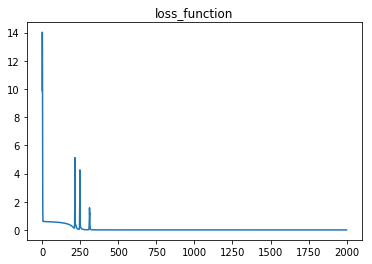

In [146]:
bp = BP(1, 4, 1, 2,learn_rate=0.01)
data = np.linspace(-2, 2, 60)
data.shape = 60, 1
loss = bp.train(data, np.sin(data), step=2000)
plt.title('loss_function')
plt.plot(loss)
plt.show()

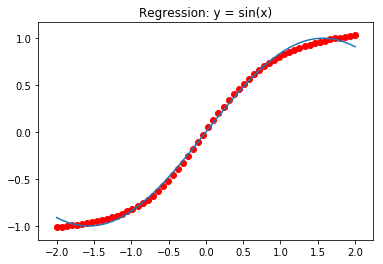

In [147]:
plt.plot(data, np.sin(data))
plt.scatter(data, bp.forward(data),color='r')
plt.title('Regression: y = sin(x)')
plt.show()

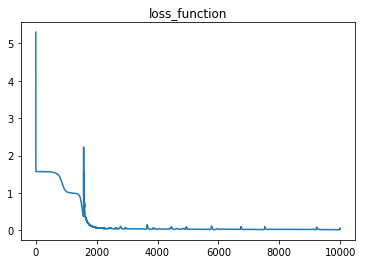

In [131]:
bp2 = BP(1, 4, 1,2,learn_rate=0.01)
data = np.linspace(-2, 2, 40)
data.shape = 40, 1
loss = bp2.train(data, data * data)
plt.title('loss_function')
plt.plot(loss)
plt.show()

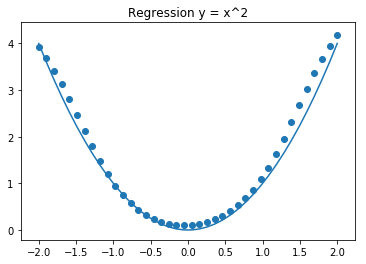

In [132]:
plt.plot(data, data * data)
plt.scatter(data, bp2.forward(data))
plt.title("Regression y = x^2")
plt.show()

In [137]:
bp3 = BP(2, 4, 1, 1,learn_rate=0.01)
data = np.linspace(0, 2, 40)
data.shape = -1, 2
label = np.sum(data, axis=1)
label.shape = -1, 1
sequence = np.linspace(0, 20, 20)
loss = bp3.train(data, label, step=1000)
print('x1',data[:,0])
print('x2',data[:,1])
# print('x1+x2',label)

x1 [0.         0.1025641  0.20512821 0.30769231 0.41025641 0.51282051
 0.61538462 0.71794872 0.82051282 0.92307692 1.02564103 1.12820513
 1.23076923 1.33333333 1.43589744 1.53846154 1.64102564 1.74358974
 1.84615385 1.94871795]
x2 [0.05128205 0.15384615 0.25641026 0.35897436 0.46153846 0.56410256
 0.66666667 0.76923077 0.87179487 0.97435897 1.07692308 1.17948718
 1.28205128 1.38461538 1.48717949 1.58974359 1.69230769 1.79487179
 1.8974359  2.        ]


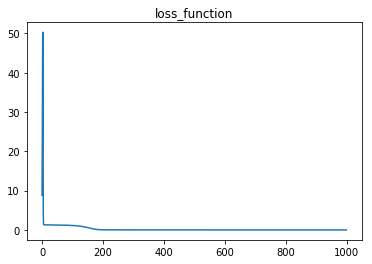

In [138]:
plt.title('loss_function')
plt.plot(loss)
plt.show()

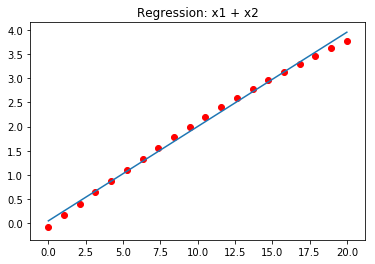

In [139]:
plt.plot(sequence, label)
plt.scatter(sequence, bp3.forward(data),color = 'r')
plt.title('Regression: x1 + x2')
plt.show()